In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)
np.set_printoptions(threshold=np.nan)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv("datasets/titanic/train.csv")
test = pd.read_csv("datasets/titanic/test.csv")

In [3]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.00,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.00,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.00,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.00,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.00,2,0,A/4 48871,24.1500,NaN,S


In [4]:
test.sum(axis=0)

PassengerId                                               460009
Pclass                                                       947
Name           Kelly, Mr. JamesWilkes, Mrs. James (Ellen Need...
Sex            malefemalemalemalefemalemalefemalemalefemalema...
Age                                                      10050.5
SibSp                                                        187
Parch                                                        164
Ticket         3309113632722402763151543101298753833097224873...
Fare                                                     14856.5
Embarked       QSQSSSQSCSSSSSSCQCSCCSSCCSCCSCSSSSCCSSSSCSSSSS...
dtype: object

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


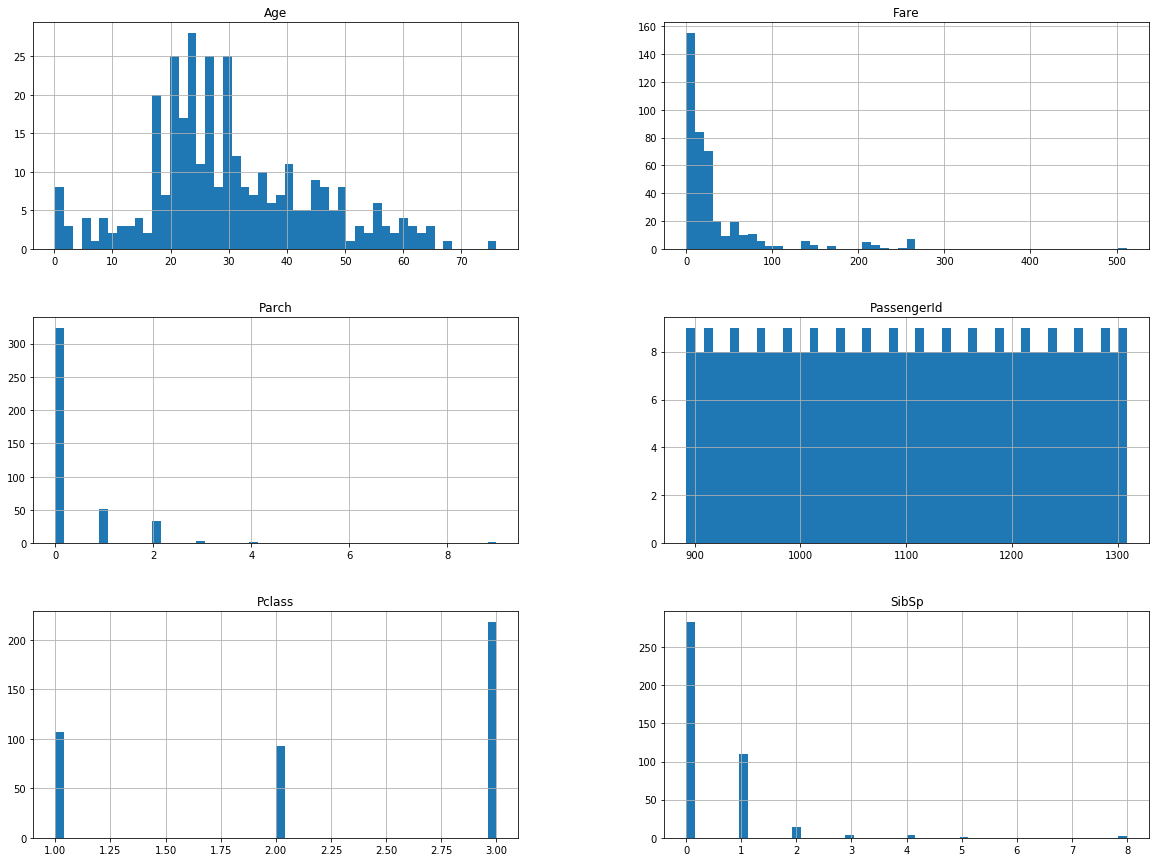

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
test.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
mean = train["Age"].mean()
train["Age"].fillna(mean, inplace=True) # option 3
del train['Cabin']



In [8]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder

class PclassEncoder(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        enc = OneHotEncoder()
        encoded_pclass = enc.fit_transform(X['Pclass'].values.reshape(-1, 1)).toarray()
        del X["Pclass"]
        new = np.c_[X, encoded_pclass]
        return pd.DataFrame(new, columns=list(X.columns)+["Pclass_1","Pclass_2","Pclass_3"])

In [9]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#pclass = train['Pclass']# .values.reshape(-1,1)
#encoded_pclass = enc.fit_transform(train['Pclass'].values.reshape(-1, 1)).toarray()
#del train["Pclass"]
#new = np.c_[train, encoded_pclass]
#train = pd.DataFrame(new, columns=list(train.columns)+["Pclass_1","Pclass_2","Pclass_3"])
enc = PclassEncoder()
train = enc.fit_transform(train)
train.to_csv("/tmp/toto.csv")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null object
Survived       891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null object
SibSp          891 non-null object
Parch          891 non-null object
Ticket         891 non-null object
Fare           891 non-null object
Embarked       889 non-null object
Pclass_1       891 non-null object
Pclass_2       891 non-null object
Pclass_3       891 non-null object
dtypes: object(13)
memory usage: 90.6+ KB


In [11]:
from sklearn.model_selection import ShuffleSplit
split = ShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(train):
    train_set = train.loc[train_index]
    val_set = train.loc[test_index]

In [12]:
print(test_index)

[709 439 840 720  39 290 300 333 208 136 137 696 485 244 344 853 621 653
 886 110 294 447 192 682 538 819  30 673  63 396 877 141 793 235 204 620
  23 198 842 739 120 477 837 790 362  86  67 350 210 659 448 820 360 802
 280 585  70 299 211  44 408 446 426 168 196 772  72 422 532 591 312 311
 889 835 833 605 767 539 357 254 266  66 319 778 174 493 215 309 822 250
 165 541 625 388  76 281 712 338 327 321 545 590 291 465 814 442 670 462
 286 209 669 227 849 512 527 876  96 292 323 736 529 218 275  78 785 604
 796 139 578 494 359  65 481 777 599 830 306 231 845  49 652 854 342 594
 885 416 213  33  31 668 584 514 688 109  77 611 643  82 518 657 296 507
 808 375   5  54 398 457 521 363  97 417 572 852 433 773  25  84  10]


In [13]:
def prepare_arrays(a_set):
    y = a_set["Survived"]
    X = a_set.copy()
    del X["Survived"]
    del X["Name"]
    del X["Ticket"]
    del X["Embarked"]
    del X["PassengerId"]
    X["Sex"] = X["Sex"].map({"male": 1, "female":0})
    
    return X,y#.as_matrix(), y.as_matrix()

X_train, y_train = prepare_arrays(train_set)
X_val, y_val = prepare_arrays(val_set)


# Some sklearn

In [14]:
X_train.to_csv("/tmp/toto2.csv")
y_train.to_csv("/tmp/toto3.csv")

In [15]:
X_train

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
331,1,45.5,0,0,28.5,1,0,0
733,1,23,0,0,13,0,1,0
382,1,32,0,0,7.925,0,0,1
704,1,26,1,0,7.8542,0,0,1
813,0,6,4,2,31.275,0,0,1
118,1,24,0,1,247.521,1,0,0
536,1,45,0,0,26.55,1,0,0
361,1,29,1,0,27.7208,0,1,0
29,1,29.6991,0,0,7.8958,0,0,1
55,1,29.6991,0,0,35.5,1,0,0


In [16]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train.as_matrix().astype(float), y_train.as_matrix().astype(int))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(log_reg, X_train.as_matrix().astype(float), y_train.as_matrix().astype(int),
                         scoring="accuracy", cv=10)


In [18]:
scores

array([ 0.84722222,  0.77777778,  0.72222222,  0.91666667,  0.84507042,
        0.74647887,  0.73239437,  0.73239437,  0.77142857,  0.88571429])

In [19]:
from sklearn.metrics import accuracy_score
y_val_pred = log_reg.predict(X_val.as_matrix())
accuracy_score(y_val.as_matrix().astype(int), y_val_pred)

0.8044692737430168

In [20]:
from sklearn.ensemble import RandomForestClassifier
rdf_clf = RandomForestClassifier()
rdf_clf.fit(X_train.as_matrix().astype(float), y_train.as_matrix().astype(int))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [21]:
scores = cross_val_score(rdf_clf, X_train.as_matrix().astype(float), y_train.as_matrix().astype(int),
                         scoring="accuracy", cv=10)

In [22]:
scores

array([ 0.79166667,  0.76388889,  0.75      ,  0.84722222,  0.83098592,
        0.78873239,  0.73239437,  0.8028169 ,  0.81428571,  0.84285714])

## Submit to the challenge

In [23]:
test["Age"].fillna(mean, inplace=True) # option 3
test["Fare"].fillna(0, inplace=True) # option 3
del test['Cabin']

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [25]:
test = enc.fit_transform(test)

In [26]:
def prepare_test_arrays(a_set):
    X = a_set.copy()
    del X["Name"]
    del X["Ticket"]
    del X["Embarked"]
    del X["PassengerId"]
    X["Sex"] = X["Sex"].map({"male": 1, "female":0})
    
    return X

X_test = prepare_test_arrays(test)

In [27]:
X_test

,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3
0,1,34.5,0,0,7.8292,0,0,1
1,0,47,1,0,7,0,0,1
2,1,62,0,0,9.6875,0,1,0
3,1,27,0,0,8.6625,0,0,1
4,0,22,1,1,12.2875,0,0,1
5,1,14,0,0,9.225,0,0,1
6,0,30,0,0,7.6292,0,0,1
7,1,26,1,1,29,0,1,0
8,0,18,0,0,7.2292,0,0,1
9,1,21,2,0,24.15,0,0,1


In [28]:
y_val_pred = rdf_clf.predict(X_test.as_matrix())

In [29]:
y_val_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0,

In [30]:
data = np.c_[test["PassengerId"],y_val_pred]
df = pd.DataFrame(data, columns=["PassengerId","Survived"])
df.to_csv("submit_skitlearn.csv",index = False)

# With tensorflow

In [54]:
nb_hidden1 = 20
nb_hidden2 = 20
nb_output=1
activation_fn = tf.nn.relu
learning_rate = 0.1
nb_epoch = 100

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)    
X_val_scaled = scaler.transform(X_val)  
X_test_scaled = scaler.fit_transform(X_test)    

reset_graph()

In [55]:
X = tf.placeholder(tf.float64, shape=(None,X_train.shape[1]), name="X")
y = tf.placeholder(tf.int64, shape=(None,nb_output), name="y")

In [56]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, nb_hidden1, name="hidden1", activation=activation_fn)
    hidden2 = tf.layers.dense(hidden1, nb_hidden2, name="hidden2", activation=activation_fn)
    logits = tf.layers.dense(hidden2, nb_output, name="logit")
    y_proba = 1 / (1 + tf.exp(-logits))
    y_pred = tf.cast(tf.rint(y_proba),tf.int64)

In [57]:
with tf.name_scope("loss"):
    #mse = tf.reduce_mean(tf.square(error), name="mse")
    loss = tf.losses.log_loss(y, y_proba)
    accuracy = tf.contrib.metrics.accuracy(y_pred, y)

In [58]:
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
    training_op = optimizer.minimize(loss)

In [59]:
init = tf.global_variables_initializer()

In [60]:
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(nb_epoch):
        sess.run(training_op, feed_dict = {X: X_train_scaled, y: np.reshape(y_train.as_matrix(),(-1,1))})
        if epoch % 5 == 0:
            acc_train_val = sess.run(accuracy, feed_dict = {X: X_train_scaled, y: np.reshape(y_train.as_matrix(),(-1,1))})
            acc_val_val = sess.run(accuracy, feed_dict = {X: X_val_scaled, y: np.reshape(y_val.as_matrix(),(-1,1))})
            print("train:", acc_train_val, "val:", acc_val_val)
    test_pred = y_pred.eval(feed_dict = {X: X_test_scaled})

train: 0.627809 val: 0.586592
train: 0.698034 val: 0.687151
train: 0.754214 val: 0.715084
train: 0.780899 val: 0.776536
train: 0.782303 val: 0.776536
train: 0.792135 val: 0.782123
train: 0.79073 val: 0.776536
train: 0.793539 val: 0.77095
train: 0.793539 val: 0.776536
train: 0.794944 val: 0.793296
train: 0.803371 val: 0.810056
train: 0.80618 val: 0.810056
train: 0.808989 val: 0.810056
train: 0.810393 val: 0.810056
train: 0.813202 val: 0.810056
train: 0.817416 val: 0.815642
train: 0.817416 val: 0.815642
train: 0.817416 val: 0.815642
train: 0.81882 val: 0.815642
train: 0.81882 val: 0.815642


In [38]:
test_pred

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [39]:
data = np.c_[test["PassengerId"],y_val_pred]
df = pd.DataFrame(data, columns=["PassengerId","Survived"])
df.to_csv("submit_tensor.csv",index = False)